# DECISION TREE

Decision Tree is a popular machine learning algorithm that can be used for both classification and regression tasks.  It works by recursively splitting the data based on the most significant attributes until a final prediction is made.

There are several types of Decision Trees, such as ID3, C4.5, C5.0 and CART.

One of the most critical steps in building a Decision Tree is attribute selection. There are several methods for selecting attributes, such as Information Gain, Entropy, and Gini Index.

Another important aspect of Decision Trees is pruning, which is the process of removing unnecessary branches to prevent overfitting.


In conclusion, the Decision Tree algorithm is a powerful and versatile technique that can be used in various domains. It requires careful attribute selection, pruning, and implementation to avoid overfitting and achieve optimal performance.

In [9]:
#ID3 (Iterative Dichotomiser 3)
#Uses "Information Gain". 
#ID3 is designed for categorical attributes and handles missing values poorly. 
#It creates a full-grown tree that may suffer from overfitting.

In [44]:
#C4.5
#C4.5 is an extension of the ID3 algorithm.
#C4.5 can handle both categorical and continuous attributes.
#It uses information gain ratio instead of information gain which overcomes the bias towards attributes with a large values.
#C4.5 also incorporates handling missing values through subtree weighting.
#Another important improvement is the ability to prune the decision tree, reducing overfitting and improving generalization.

#C5.0
#It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

In [11]:
#CART (Classification and Regression Tree)
#CART can handle both classification and regression problems.
#It constructs binary decision trees, where each internal node has exactly two branches.
#CART uses the Gini impurity as the measure to evaluate the quality of attribute splits for classification tasks.
#CART also supports pruning to prevent overfitting, similar to C4.5.

In [12]:
#Attribute Selection by 
#Entropy (used when Not Imbalanced dataset or has categorical features)
#Gini Index (used when imbalanced dataset or has continous features)
#Information Gain

In [13]:
'''
Advantages
1. Easy to understand
2. Handles both categorical and numerical features
3. Handles missing values
4. Non- parametric (No assumption on the distribution of data)
5. Feature Importance

Disadvantages
1.Overfitting (Tree is deep or contains noisy data)
2.Instability
3.Bias
4.Computational complexity
5.Limited to axis parallel splits
'''

'\nAdvantages\n1. Easy to understand\n2. Handles both categorical and numerical features\n3. Handles missing values\n4. Non- parametric (No assumption on the distribution of data)\n5. Feature Importance\n\nDisadvantages\n1.Overfitting (Tree is deep or contains noisy data)\n2.Instability\n3.Bias\n4.Computational complexity\n5.Limited to axis parallel splits\n'

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn import tree
from sklearn.tree import plot_tree

In [16]:
data = pd.read_csv("./Datasets/dataset_drug.csv")

In [18]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [20]:
data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Cocain',
       'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
       'Mushrooms', 'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Cocain  

In [23]:
data.duplicated().sum()      #if duplicates we can drop y df.drop_duplicates(inplace=True)

0

In [25]:
data.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Cocain       0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [26]:
df = data.copy()

In [27]:
columns = ['VSA']

In [28]:
from sklearn.preprocessing import LabelEncoder
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [29]:
for i in range(len(columns)):
    df.loc[((df[columns[i]]==0) | (df[columns[i]]==1)),columns[i]] = 'Non-user'
    df.loc[((df[columns[i]]==2) | (df[columns[i]]==3) | (df[columns[i]]==4) | (df[columns[i]]==5) | (df[columns[i]]==6)),columns[i]] = 'User'

In [30]:
count_of_users = []
count_of_non_users = []

In [31]:
for i in range(len(columns)):
    s = df.groupby([columns[i]])[columns[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])

In [32]:
x=count_of_users
y=count_of_non_users
print('Users Count:',x)
print('Non_Users Count:',y)

Users Count: [230]
Non_Users Count: [1655]


In [33]:
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [34]:
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
target = ['VSA']

X = df[features].values
y = df[target].values

In [35]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
X = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select = 9, cv =None, direction ='backward').fit_transform(X, y)

C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [36]:
X.shape

(1885, 9)

In [37]:
X[0]

array([ 0.49788,  0.96082,  0.126  ,  0.31287, -0.57545, -0.58331,
       -0.91699, -0.00665, -0.21712])

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [39]:
X[0]

array([0.40913683, 1.        , 0.4090609 , 0.5605621 , 0.41211633,
       0.43568983, 0.36765377, 0.49904023, 0.4284743 ])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.33)

In [42]:
# DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, criterion='entropy',random_state=42)
dt.fit(X_train, y_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       random_state=42)

In [74]:
y_pred = dt.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8683788121990369


In [76]:
from sklearn import metrics
def plot_confusion_metrix(y_test,y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    classNames = ['Non-User','User']
    plt.title('Confusion Matrix')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [77]:
def report_performance(model):
    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, y_pred))
    plot_confusion_metrix(y_test, y_pred)



Confusion Matrix:
[[540   2]
 [ 80   1]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       542
           1       0.33      0.01      0.02        81

    accuracy                           0.87       623
   macro avg       0.60      0.50      0.48       623
weighted avg       0.80      0.87      0.81       623



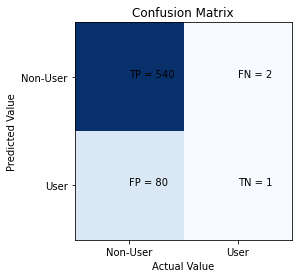

In [78]:
report_performance(dt) 

In [79]:
#Sensitivity and Specificity
cm1 = metrics.confusion_matrix(y_test, y_pred)

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity = ', sensitivity )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity = ', specificity)

precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision = ', precision)

Sensitivity =  0.996309963099631
Specificity =  0.012345679012345678
Precision =  0.8709677419354839


In [80]:
features1 = 'Age', 'Country', 'Ethnicity', 'Nscore','Escore','Oscore', 'Ascore','Cscore','Impulsive'
target1 = ['Non-User','User']

In [81]:
from sklearn.tree import export_text

tree_rules = export_text(dt,feature_names = list(features1))

print(tree_rules)

|--- Age <= 0.33
|   |--- Country <= 0.77
|   |   |--- Cscore <= 0.60
|   |   |   |--- Impulsive <= 0.38
|   |   |   |   |--- Cscore <= 0.38
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Cscore >  0.38
|   |   |   |   |   |--- class: 0
|   |   |   |--- Impulsive >  0.38
|   |   |   |   |--- Escore <= 0.78
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Escore >  0.78
|   |   |   |   |   |--- class: 1
|   |   |--- Cscore >  0.60
|   |   |   |--- Oscore <= 0.69
|   |   |   |   |--- Ascore <= 0.57
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Ascore >  0.57
|   |   |   |   |   |--- class: 0
|   |   |   |--- Oscore >  0.69
|   |   |   |   |--- class: 0
|   |--- Country >  0.77
|   |   |--- Cscore <= 0.29
|   |   |   |--- class: 0
|   |   |--- Cscore >  0.29
|   |   |   |--- Age <= 0.12
|   |   |   |   |--- Escore <= 0.68
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Escore >  0.68
|   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  0.12
|   |   |   |

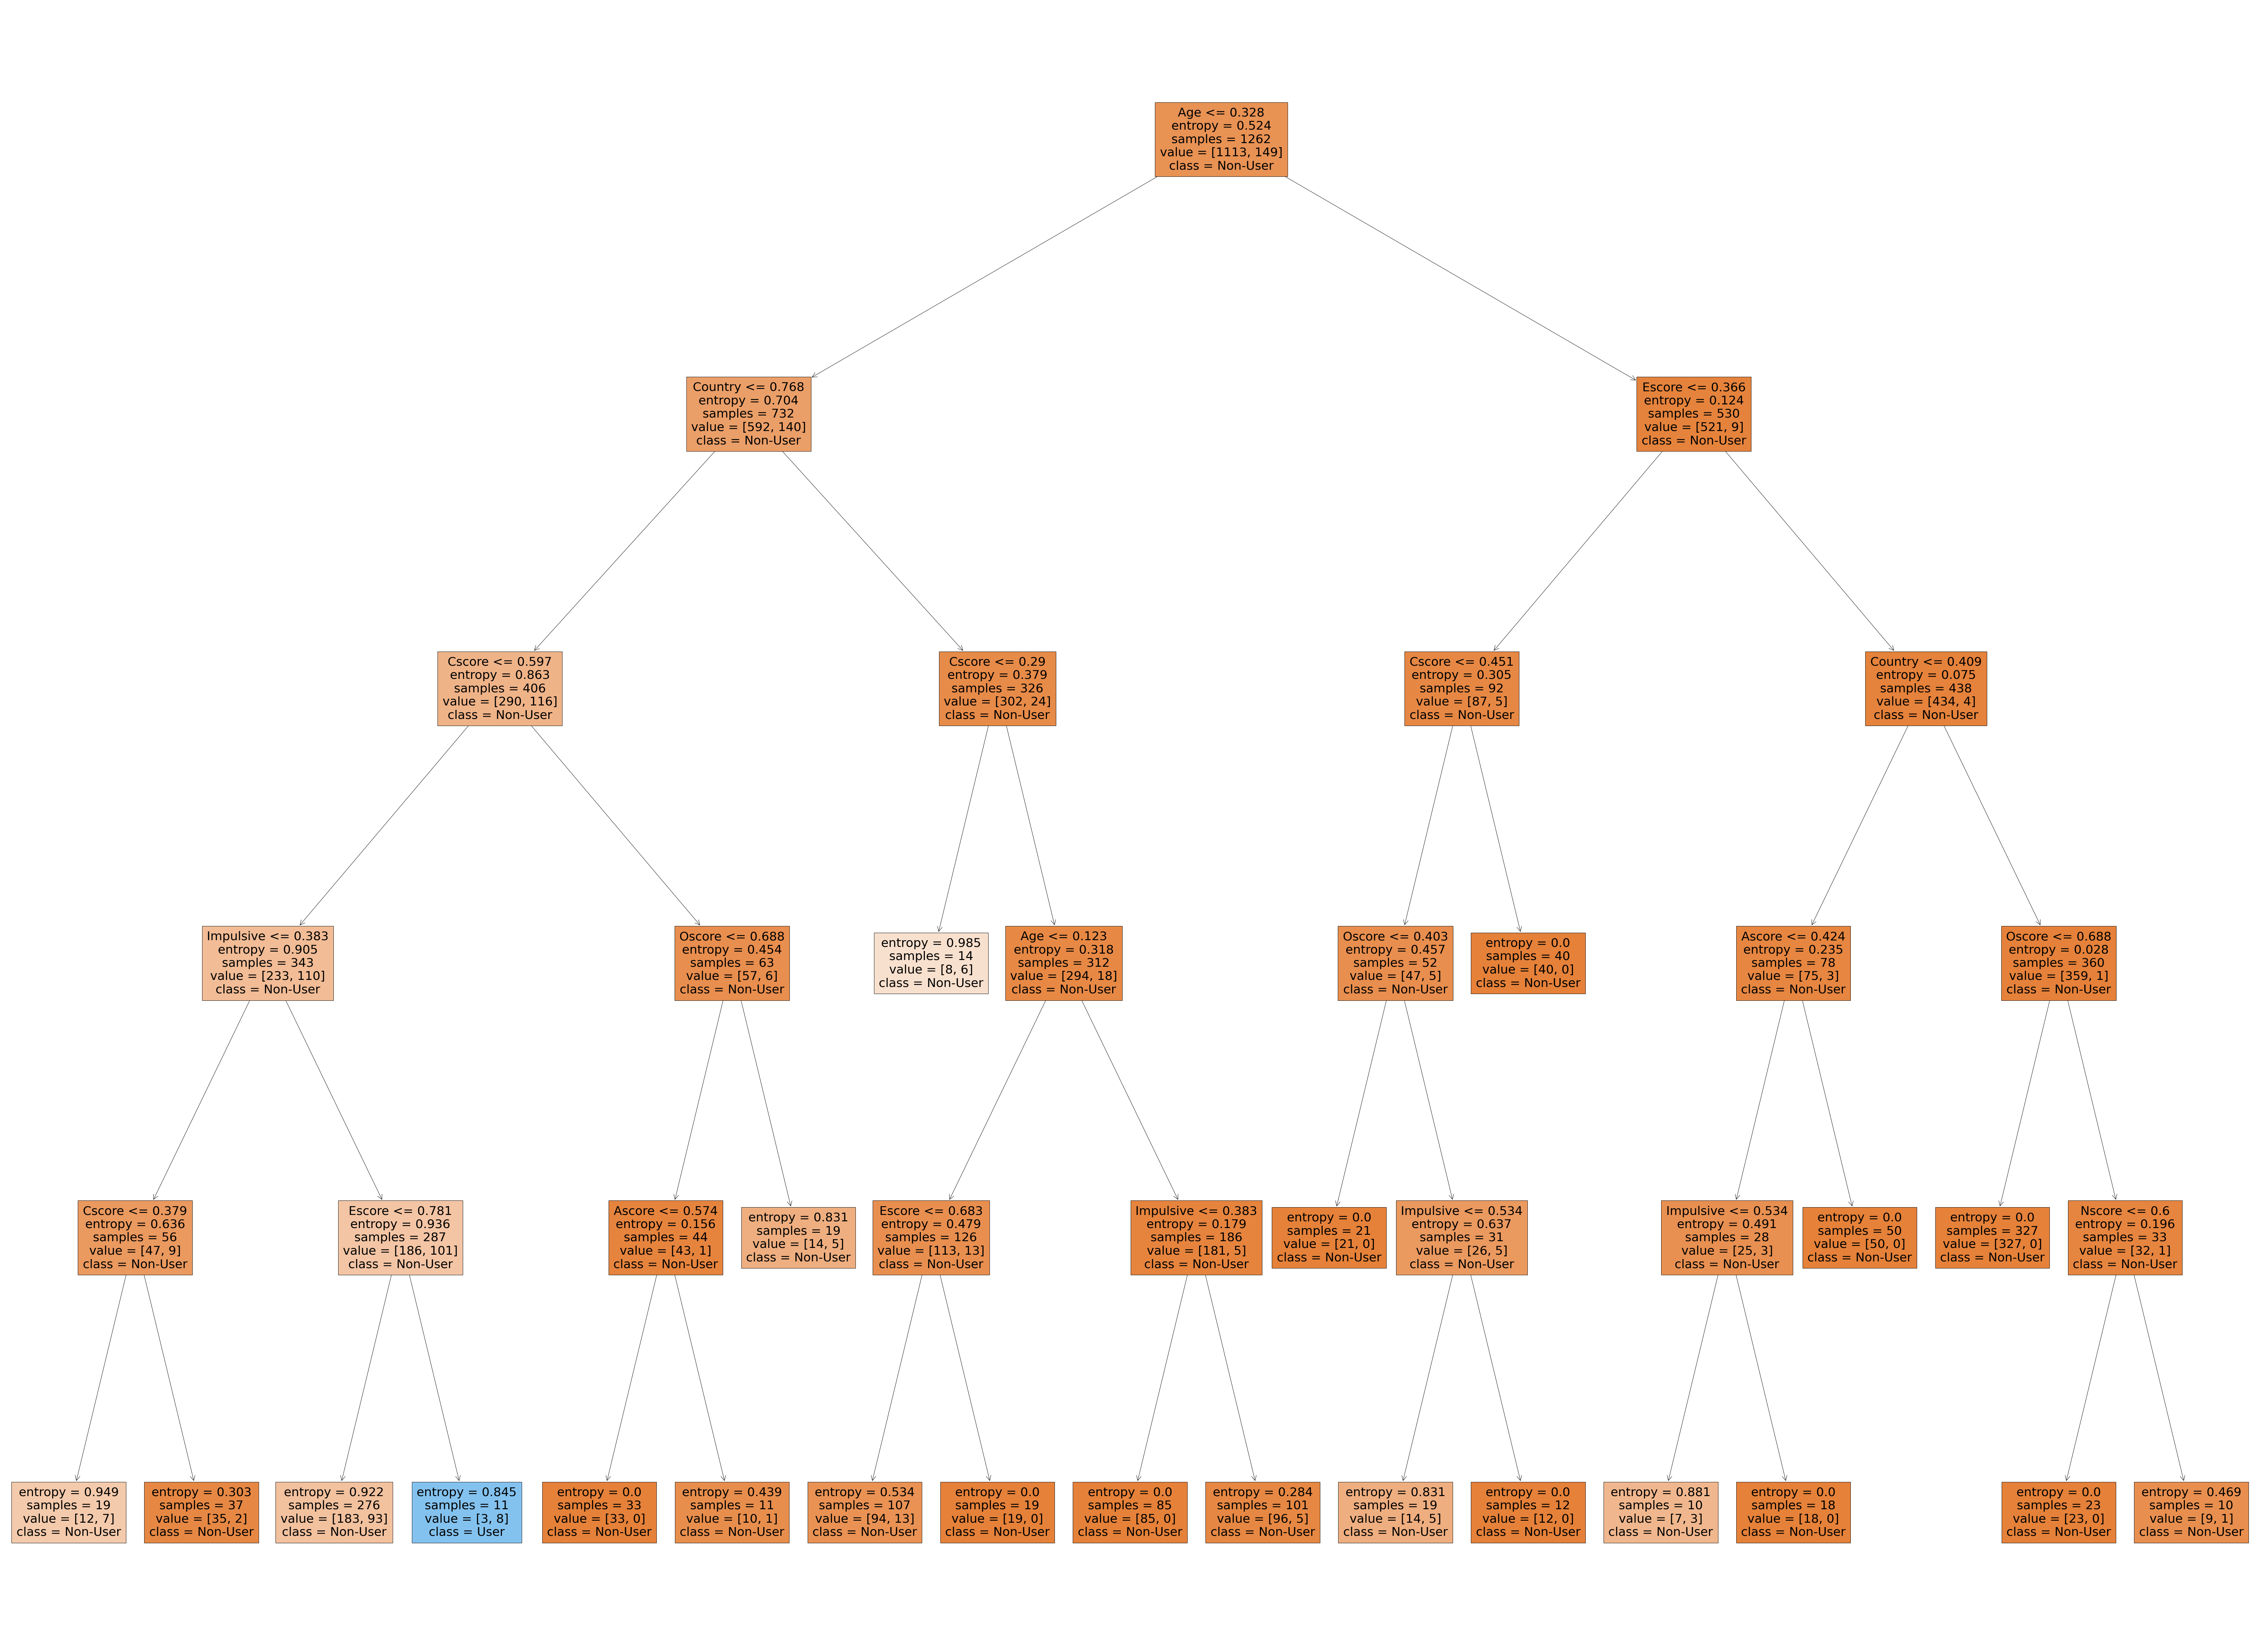

In [82]:
fig = plt.figure(figsize=(120,90))
viz = tree.plot_tree(dt,feature_names=features1,class_names=target1,filled=True)

In [83]:
from sklearn.metrics import roc_curve,auc
def roc_curves(model):
    predictions_test = model.predict(X_test)
    metrics.plot_roc_curve(model, X_test, y_test) 

    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='-.')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-Curve')
    plt.legend(loc="lower right")
    plt.show()

C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


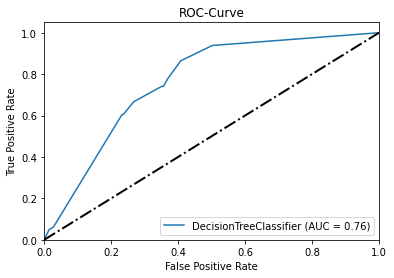

In [84]:
roc_curves(dt)

In [85]:
#To chech where the decision tree went wrong
predictions = dt.predict(X_test)
for input, prediction, label in zip(X_test, predictions, y_test):
  if prediction != label:
    print(input, 'has been classified as ', prediction, 'and should be ', label)

[0.         1.         0.26214307 0.93292512 0.20651022 0.39293892
 0.56329019 0.24285438 0.50357257] has been classified as  0 and should be  [1]
[0.         0.53518496 0.26214307 0.87959705 0.54917179 0.57765151
 0.36765377 0.35358046 0.80949082] has been classified as  0 and should be  [1]
[0.         0.         0.26214307 0.5759666  0.74204397 0.70217503
 0.56329019 0.4601557  0.56534264] has been classified as  0 and should be  [1]
[0.         0.30860077 0.26214307 0.26308307 0.76587465 0.62459963
 0.56329019 0.63559359 0.70506794] has been classified as  0 and should be  [1]
[0.24647542 0.         0.26214307 0.54736291 0.31188205 0.67314275
 0.39017308 0.4601557  0.4284743 ] has been classified as  0 and should be  [1]
[0.         0.         0.26214307 0.73548927 0.20651022 0.43568983
 0.24425291 0.5844153  0.4284743 ] has been classified as  0 and should be  [1]
[0.         0.18609846 0.40521254 0.68224579 0.25054445 0.52702274
 0.34480106 0.35358046 0.50357257] has been classif

In [ ]:
#Save the image
#tree.export_graphviz(dt,out_file=open("tree.dot","w"),feature_names=features1,class_names=target1)